# Testing basic operators in package `Whirl2d`

In [1]:
include(joinpath(Pkg.dir("whirl2d"), "src/Whirl2d.jl"))
import Whirl2d
import Whirl2d:@get
using PyPlot
@get Whirl2d (Systems, Grids, DualPatch, Bodies, TimeMarching, NavierStokes);

### Create a body

In [2]:
Npts = 100
rad = 0.5
xcent = [0.0,0.0]
ang = 0.0
b = Bodies.Circle(Npts,rad,xcent,ang)

Body: number of points = 100, reference point = (0.0,0.0), rotation matrix = [1.0 -0.0; 0.0 1.0]


### Create a domain containing the body

In [3]:
xmin = [-1.0,-1.0]
xmax = [1.0,1.0]
dom = Systems.DualDomain(xmin,xmax)
dom = Systems.add_body(dom,b)

Domain: xmin = [-1.0, -1.0], xmax = [1.0, 1.0]
number of bodies = 1
Body: number of points = 100, reference point = (0.0,0.0), rotation matrix = [1.0 -0.0; 0.0 1.0]



#### Add a filling dual grid to this domain
The boundaries of the domain coincide with the boundaries of the dual grid

In [4]:
Δx = 0.02
dom = Systems.add_grid(dom,Δx)

Domain: xmin = [-1.0, -1.0], xmax = [1.0, 1.0]
number of bodies = 1
Body: number of points = 100, reference point = (0.0,0.0), rotation matrix = [1.0 -0.0; 0.0 1.0]

Grid: number of cells = (100,100), Δx = 0.02, xmin = [-1.0, -1.0], xmax = [1.0, 1.0]



### Construct grid and body-grid operators

In [14]:
# Set up the LGF and integrating factor tables
Grids.lgf_table!(dom.grid);
α = 5.0
Grids.q_table!(dom.grid,α);

In [6]:
# Create a "grid unit vector": a bunch of cell data with zeros everywhere except at one point.
# This is useful for visualizing the LGF and the integrating factor
wunit = zeros(dom.grid.cell);
wunit[40,40] = 1.0;

In [15]:
# This is the discrete convolution of the integrating factor with the grid unit vector
# The result is just the integrating factor field, but shifted to the center specified
# in the grid unit vector.
@time s = Grids.Q(dom.grid)(wunit);

  0.002715 seconds (42 allocations: 729.000 KiB)


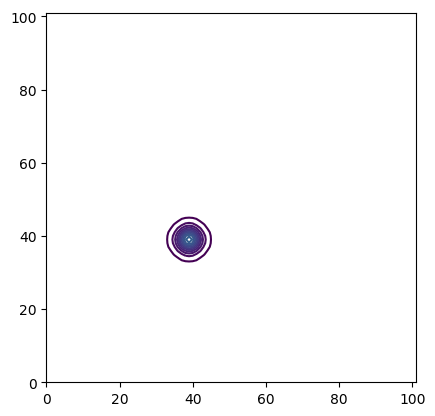

(0.0, 101.0, 0.0, 101.0)

In [18]:
# plot this
contour(s,linspace(0.001,0.1,31))
axis("scaled")

In [19]:
# This is the discrete convolution of the LGF with the grid unit vector
@time s = Grids.L⁻¹(dom.grid)(wunit);

  0.007008 seconds (1.90 k allocations: 819.923 KiB)


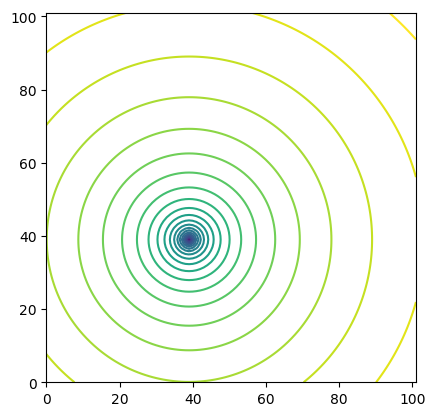

(0.0, 101.0, 0.0, 101.0)

In [20]:
# plot this
contour(s,31)
axis("scaled")

#### Construct and plot the C<sup>T</sup> E<sub>y</sub><sup>T</sup> operator

In [21]:
@time Systems.construct_CᵀEᵀ!(dom)

  4.523191 seconds (2.87 M allocations: 370.133 MiB, 1.58% gc time)


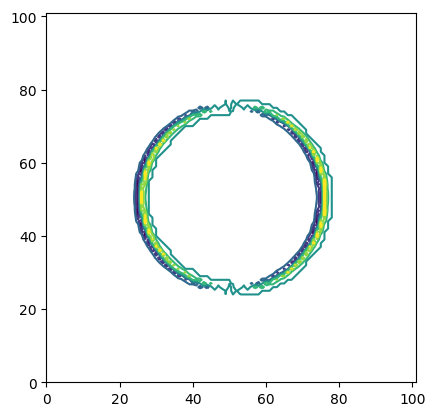

(0.0, 101.0, 0.0, 101.0)

In [22]:
contour(reshape(dom.CᵀEᵀ[1]*ones(dom.nbodypts),size(dom.grid.cell)))
axis("scaled")